# Home Credit Default Risk

## Predicting how capable each applicant is of repaying a loan?

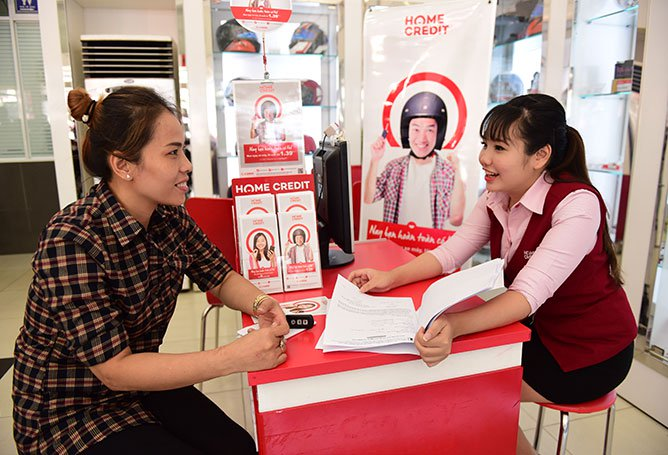

Introduction: Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

https://www.kaggle.com/c/home-credit-default-risk

The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:

Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features.

Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

## Import necessary libraries.

In [3]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns


# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# display plots on the notebook itself
%matplotlib inline

## Read the data files

In [4]:
train = pd.read_csv("../dataset/all/application_train.csv")
test = pd.read_csv("../dataset/all/application_test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## How is the statistic?

In [6]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


## How are the target labels spread?

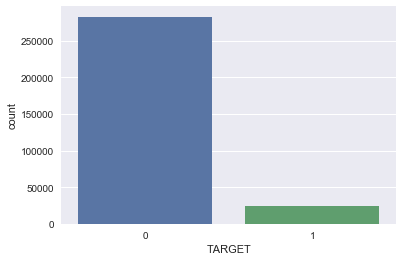

In [7]:
sns.countplot(train.TARGET)

### This is clearly an imbalanced target. There are more number of people who returned - 0 as opposed to people who had difficulties -1.

## What are the dimensions of Train and Test dataset?

In [8]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))

The train dataset dimensions are as follows: (307511, 122)
The test dataset dimensions are as follows: (48744, 121)


## Look at the train dataset

In [9]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Look at the test dataset

In [10]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### As expected, test dataset contains all the columns except the target label.

## What are the missing values and their column names?

In [11]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]
    

In [12]:
missing_columns(train)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,214865,0.698723,69.9
COMMONAREA_AVG,214865,0.698723,69.9
COMMONAREA_MODE,214865,0.698723,69.9
NONLIVINGAPARTMENTS_MODE,213514,0.694330,69.4
NONLIVINGAPARTMENTS_MEDI,213514,0.694330,69.4
NONLIVINGAPARTMENTS_AVG,213514,0.694330,69.4
FONDKAPREMONT_MODE,210295,0.683862,68.4
LIVINGAPARTMENTS_MEDI,210199,0.683550,68.4
LIVINGAPARTMENTS_MODE,210199,0.683550,68.4
LIVINGAPARTMENTS_AVG,210199,0.683550,68.4


In [13]:
missing_columns(test)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,33495,0.687161,68.7
COMMONAREA_AVG,33495,0.687161,68.7
COMMONAREA_MODE,33495,0.687161,68.7
NONLIVINGAPARTMENTS_MODE,33347,0.684125,68.4
NONLIVINGAPARTMENTS_MEDI,33347,0.684125,68.4
NONLIVINGAPARTMENTS_AVG,33347,0.684125,68.4
FONDKAPREMONT_MODE,32797,0.672842,67.3
LIVINGAPARTMENTS_AVG,32780,0.672493,67.2
LIVINGAPARTMENTS_MEDI,32780,0.672493,67.2
LIVINGAPARTMENTS_MODE,32780,0.672493,67.2


We will have to handle these missing values (known as imputation). Other option would be to drop all those columns where there are large number of missing values. Unless we know the feature importance, it is not possible to make a call on which columns to keep which ones to drop.

## What are the different datatypes of columns? - How many floats, integers, categoricals?

In [14]:
print("Train dataset: \n{}".format(train.dtypes.value_counts()))
print()
print("Test dataset: \n{}".format(test.dtypes.value_counts())) 

Train dataset: 
float64    65
int64      41
object     16
dtype: int64

Test dataset: 
float64    65
int64      40
object     16
dtype: int64


### In test dataset, 40 int64 indicates that the target label is missing - which is obvious.

### What are the different kinds of classes in every categorical column?

In [15]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Handling Categorical variables - Label Encoding and One Hot Encoding.

Some machine learning models can't learn if provided with text categories. The categorical variables are to be converted into
numerical equivalent, which is done by Label encoding and One hot encoding.

<b>Label encoding:</b> It is the process of assigning each unique category in a categorical variable with an integer. No new columns are created. 

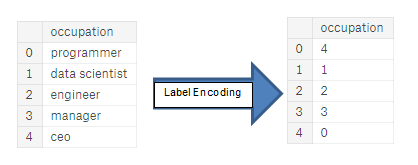

In [16]:
# Create a label encode object having less than or equal to 2 unique values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transform_counter = 0

# iterate through all the categorical columns
for col in train.select_dtypes('object').columns:
    
    # select only those columns where number of unique values in the category is less than or equal to 2 
    if pd.Series.nunique(train[col]) <= 2:
        train[col] = le.fit_transform(train[col].astype(str))
        test[col] = le.fit_transform(test[col].astype(str))
        transform_counter+=1
        
print("Label encoded {} columns.".format(transform_counter))    

Label encoded 4 columns.


<b>One-hot encoding:</b> create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

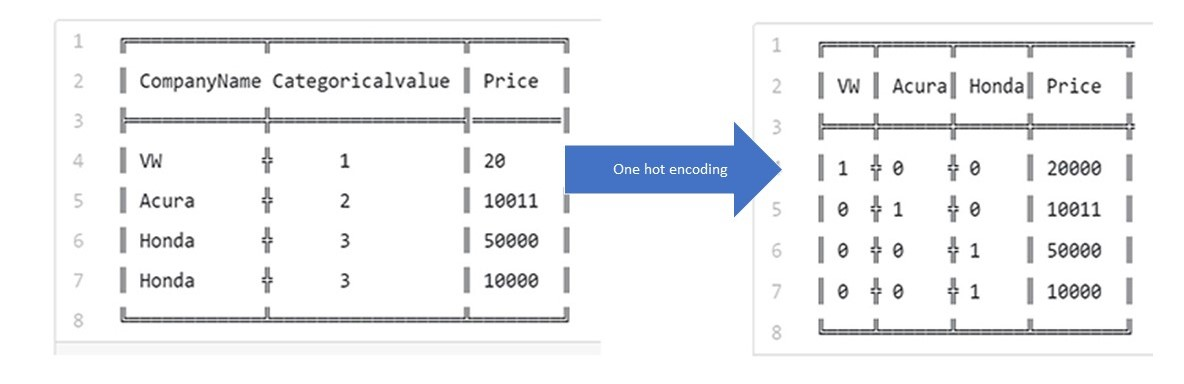
Credit : https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In [17]:
# one-hot encode of categorical variables
train = pd.get_dummies(train)
test = pd.get_dummies(test)

One hot encoding would added more columns, checking how many there are: 

In [18]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 242)
Testing Features shape:  (48744, 238)


There is a mismatch in the count of columns for test and train. This can be fixed by aligning them.

In [19]:
# collect the target labels to support the aligning 

target = train['TARGET']

## Ensure train and test have the same number of columns by aligning.

In [20]:
train, test = train.align(test,axis=1,join='inner')

Add the stored target column back into the train dataset.

In [21]:
train['TARGET'] = target

In [22]:
print('Training Features shape: ', train.shape)
print('Testing Features shape: ', test.shape)

Training Features shape:  (307511, 239)
Testing Features shape:  (48744, 238)


<h3>On the look for Anomalies</h3> 
</br>

One problem we always want to be on the lookout for is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies checking is by looking at the statistics of a column using the describe method. The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can multiply by -1 and divide by the number of days in a year:

## How old are clients?

In [23]:
(train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Ages seem to be fine, nothing in particluar seems to be off.

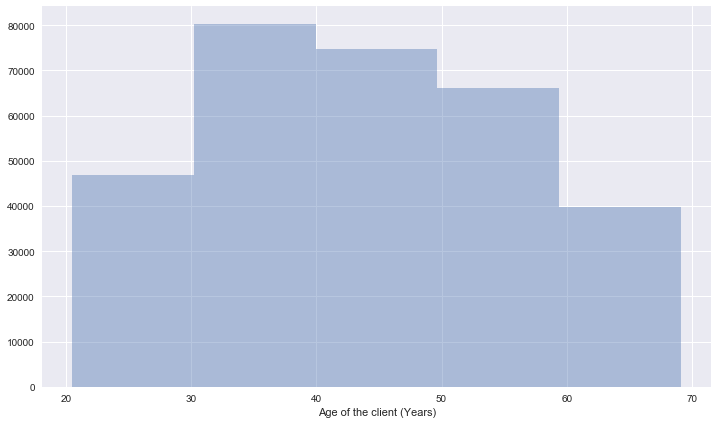

In [28]:
fig, ax = plt.subplots(figsize =(12,7))
sns.distplot(train['DAYS_BIRTH']/-365,bins=5,kde=False)
plt.xlabel("Age of the client (Years)")

People in the age range 30-40 years are the most applicants. Which seems pretty normal.

### How many years has it been since the applicant started working? 
The DAYS_EMPLOYED column is negative because the days are relative only to the time of the application. -ve means so many days since the application, the client has been working. +ve means, the client is about to work in those many days. In an ideal world, the -ve has significance, +ve could mean anything from client starts working to client can be fired and resumes working, which in anyway doesn't make sense because the loan might not be given to those clients without any work.

In [33]:
(train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

This doesn't seem right, the maximum value (besides being positive) is about 1000 years!

### Who are these special people who got employed 1000 years after issuance of the loan? 

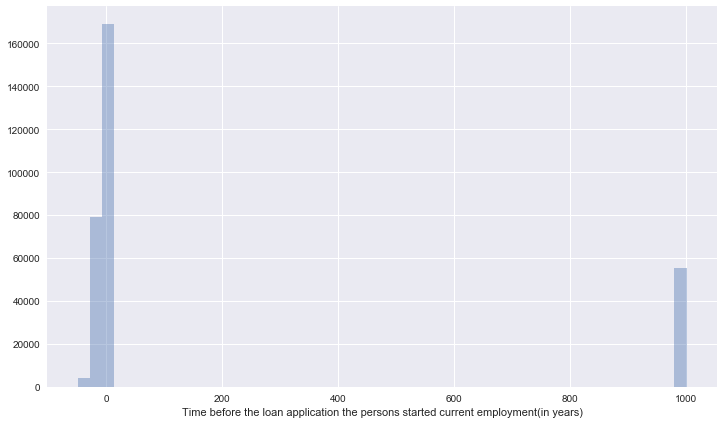

In [31]:
fig, ax = plt.subplots(figsize=(12,7))
sns.distplot(train['DAYS_EMPLOYED']/365,kde=False)
plt.xlabel("Time before the loan application the persons started current employment(in years)")

So, how many of these 1000 year anomalies?

In [39]:
# find the number of records where DAYS_EMPLOYED is between [900,1100] years. 
thousand_anomalies = train[(train['DAYS_EMPLOYED']/365>=900) & (train['DAYS_EMPLOYED']/365<=1100)]
len(thousand_anomalies)

55374

## Lets look their ability to repay.

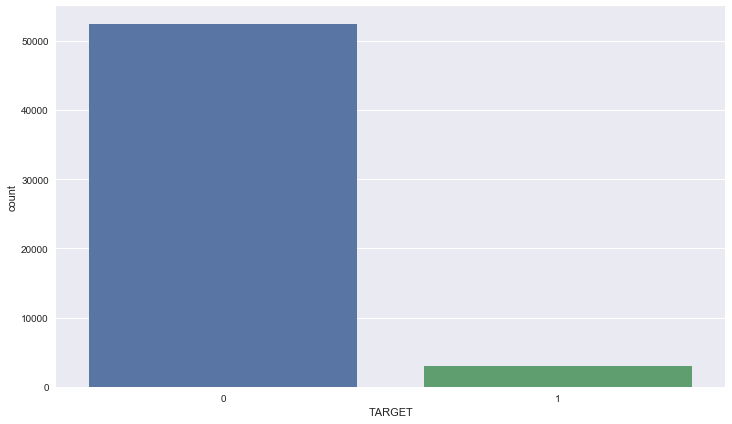

In [41]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='TARGET',data=thousand_anomalies)

## Most anomalies were able to repay on time. But how can they be contrasted in relation to non anomalies?

In [47]:
# get the index of anomalies and non anomalies
anomalies_index = pd.Index(thousand_anomalies.index)
non_anomalies_index = train.index.difference(anomalies_index)

In [62]:
# get the anomalies records
non_anomalies = train.iloc[non_anomalies_index]

In [63]:
# get the anomaly targets
anomalies_target = thousand_anomalies['TARGET'].value_counts()
non_anomalies_target = non_anomalies['TARGET'].value_counts()

In [65]:
# find the default rate for anomalies and non anomalies

print("Anomalies have a default rate of {}%".format(100*anomalies_target[1]/(anomalies_target[1]+anomalies_target[0])))
print("Non Anomalies have a default rate of {}%".format(100*non_anomalies_target[1]/(non_anomalies_target[1]+non_anomalies_target[0])))

Anomalies have a default rate of 5.399646043269405
Non Anomalies have a default rate of 8.659974537652149


So surprisingly anomalies have lesser default rate!

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

In [7]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].replace({365243: np.nan})

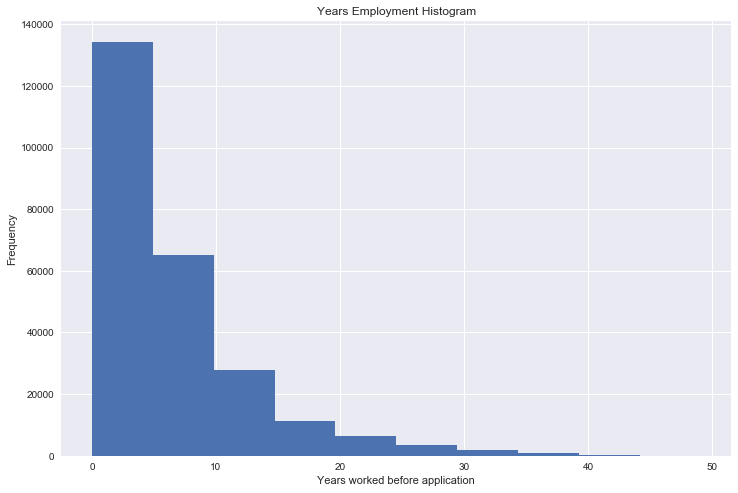

In [19]:
# Looking at the years employed for anomalies

plt.figure(figsize=(12,8))
(train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram')
plt.xlabel("Years worked before application")

In [26]:
corr_train = train.corr()['TARGET']

In [27]:
print(corr_train.sort_values().tail(10))
corr_train.sort_values().head(10)

NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64


EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED                          -0.044932
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
Name: TARGET, dtype: float64

### Since EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1 and DAYS_BIRTH are highly correlated, let us also explore the possibility of having them as interaction variables.


## Initially filling up the missing values for the most correlated variables.

In [28]:
from sklearn.preprocessing import Imputer

In [29]:
poly_fitting_vars = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1','DAYS_BIRTH']

In [30]:
imputer = Imputer(missing_values='NaN', strategy='median')

In [31]:
train[poly_fitting_vars] = imputer.fit_transform(train[poly_fitting_vars])

In [32]:
test[poly_fitting_vars] = imputer.transform(test[poly_fitting_vars])

## Let us generate valuable features - interaction variables.

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
poly_feat = PolynomialFeatures(degree=4)

#### I also tried for polynomial degree of order 10. Couldn't find much improvement from degree 4 to 10. Fun fact: order of 10 created over 1000 interaction variables! 

In [35]:
poly_interaction_train = poly_feat.fit_transform(train[poly_fitting_vars])

In [36]:
poly_interaction_test = poly_feat.fit_transform(test[poly_fitting_vars])

## Build a dataframe out of interaction variables only!

In [37]:
poly_interaction_train = pd.DataFrame(poly_interaction_train,columns=poly_feat.get_feature_names(poly_fitting_vars))

In [38]:
poly_interaction_test =  pd.DataFrame(poly_interaction_test,columns=poly_feat.get_feature_names(poly_fitting_vars))

## Add the 'TARGET' column which is later used for looking up correlations with the interaction variables.

In [39]:
poly_interaction_train['TARGET'] = train['TARGET']

In [40]:
interaction = poly_interaction_train.corr()['TARGET'].sort_values()

## Which are the most correlated interaction variables?

In [41]:
# looking at the top 15 most positive and negative correlated interaction variables.
print(interaction.tail(15))
(interaction.head(15))

EXT_SOURCE_2^3 DAYS_BIRTH                            0.140230
EXT_SOURCE_3^2 DAYS_BIRTH                            0.141777
EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH               0.144206
EXT_SOURCE_2^2 DAYS_BIRTH                            0.149313
EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH               0.149813
EXT_SOURCE_3 DAYS_BIRTH                              0.150109
EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH                 0.151816
EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH                 0.155891
EXT_SOURCE_2 DAYS_BIRTH                              0.156873
EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH               0.164466
EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH               0.168159
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH    0.174173
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH                 0.181283
TARGET                                               1.000000
1                                                         NaN
Name: TARGET, dtype: float64


EXT_SOURCE_3 EXT_SOURCE_2                  -0.193939
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1     -0.189605
EXT_SOURCE_3 EXT_SOURCE_2^2                -0.176428
EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1   -0.174534
EXT_SOURCE_3^2 EXT_SOURCE_2                -0.172282
EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1   -0.170938
EXT_SOURCE_2 EXT_SOURCE_1                  -0.166625
EXT_SOURCE_3 EXT_SOURCE_1                  -0.164065
EXT_SOURCE_3^2 EXT_SOURCE_2^2              -0.162923
EXT_SOURCE_3 EXT_SOURCE_2^3                -0.161994
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2   -0.160677
EXT_SOURCE_2                               -0.160295
EXT_SOURCE_2^2 EXT_SOURCE_1                -0.156867
EXT_SOURCE_3                               -0.155892
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2     -0.154886
Name: TARGET, dtype: float64

## Get the names of the columns which have the highest correlation - '1' and 'TARGET' can be dropped.

In [42]:
set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'}))

{'EXT_SOURCE_2',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^3 DAYS_BIRTH',
 'EXT_SOURCE_3',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1',
 'EXT_SOURCE_3 EXT_SOURCE_2^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1',
 'EXT_SOURCE_3^2 EXT_SOURCE_2^2'

## Choose the selected columns which have highest correlation to 'TARGET'. Columns '1' and 'TARGET' are not necessary!

In [43]:
selected_inter_variables = list(set(interaction.head(15).index).union(interaction.tail(15).index).difference(set({'1','TARGET'})))

In [44]:
# look at the selected features
poly_interaction_train[selected_inter_variables].head()

,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1,...,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH
0,-28.791659,0.000800,-48.326185,0.003043,0.262949,-1318.634256,-2487.756636,-183.785678,-654.152107,0.005741,...,-346.733022,3.280441e+06,0.000424,-109.495390,0.001343,-206.575767,-54.318807,0.009637,-91.172960,-15.261005
1,-1738.108981,0.064511,-2988.969365,0.103675,0.622246,-8973.906339,-10431.950422,-4803.518937,-6491.237078,0.120520,...,-5583.975307,9.361535e+07,0.055495,-2793.283699,0.110938,-3247.125160,-2020.509913,0.207254,-3474.605044,-1495.178425
2,-3908.621640,0.114084,-5635.596478,0.205220,0.555912,-13895.327191,-10587.901540,-10137.567875,-5885.942404,0.156373,...,-7724.580288,1.471224e+08,0.149722,-7031.006802,0.164491,-5357.456268,-2978.274675,0.225464,-4294.187521,-5129.588365
3,-3348.134986,0.114589,-3541.866544,0.176171,0.650442,-10172.925140,-12361.644326,-5445.325225,-8040.528832,0.214075,...,-6616.894625,1.257541e+08,0.094300,-5147.479068,0.121220,-6254.966447,-4068.490949,0.226462,-4303.904125,-2755.323295
4,-1742.320648,0.028212,-1843.135727,0.087413,0.322738,-10669.126224,-6432.819536,-5710.929881,-2076.117157,0.052705,...,-3443.335521,6.863256e+07,0.046790,-5398.555790,0.029844,-3254.993372,-1050.510985,0.055754,-1111.296208,-2889.718701


In [45]:
poly_interaction_test[selected_inter_variables].head()

,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1,...,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_3^2 EXT_SOURCE_1 DAYS_BIRTH
0,-1824.110478,0.074862,-386.627243,0.094803,0.789654,-3069.315478,-15193.739370,-489.615795,-11997.802403,0.469296,...,-2423.698322,4.663438e+07,0.015123,-2310.011305,0.015867,-11435.028416,-9029.719944,0.099469,-1913.883926,-368.491942
1,-1288.767295,0.020808,-987.604448,0.071345,0.291656,-7821.019554,-5268.465530,-3386.201665,-1536.577117,0.048060,...,-2281.043619,4.120477e+07,0.030889,-4418.799416,0.015946,-2976.631403,-868.151015,0.036829,-665.278990,-1913.170762
2,-4335.147954,0.151396,-5234.681105,0.216346,0.699787,-12243.044232,-14022.328504,-7480.393855,-9812.640816,0.247788,...,-8567.521115,1.716760e+08,0.132186,-6194.955045,0.182811,-7095.269204,-4965.175946,0.299203,-5995.438444,-3785.063810
3,-2294.536289,0.083677,-2674.113111,0.164177,0.509677,-8563.154516,-7123.246872,-5246.681115,-3630.555667,0.136570,...,-4364.443591,6.099746e+07,0.100592,-4501.941285,0.097520,-3744.932912,-1908.706472,0.159163,-2224.456866,-2758.358532
4,-600.633070,0.019608,-1590.465410,0.046061,0.425687,-6980.002306,-5550.962315,-3736.229463,-2362.974127,0.036631,...,-2971.298294,3.874573e+07,0.024655,-1410.972511,0.051920,-1122.099233,-477.663386,0.096997,-1264.843931,-755.260075


## Get a list of unselected columns that are to be dropped.

In [46]:
unselected_cols = [element for element in poly_interaction_train.columns if element not in selected_inter_variables]

##  Drop the unselected columns of the interaction dataframes - train and test versions both.

In [47]:
poly_interaction_train = poly_interaction_train.drop(unselected_cols,axis=1)

In [48]:
poly_interaction_test = poly_interaction_test.drop(list(set(unselected_cols).difference({'TARGET'})),axis=1)

## Merge polynomial features into the original dataframes using their indices.

#### Dropping columns 'EXT_SOURCE_2' and 'EXT_SOURCE_3' since they're already present in the source dataset.

In [49]:
train = train.join(poly_interaction_train.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

In [50]:
test = test.join(poly_interaction_test.drop(['EXT_SOURCE_2', 'EXT_SOURCE_3'],axis=1))

## What are their merged dataframe dimensions?

In [51]:
print("The train dataset dimensions are as follows: {}".format(train.shape))
print("The test dataset dimensions are as follows: {}".format(test.shape))

The train dataset dimensions are as follows: (307511, 265)
The test dataset dimensions are as follows: (48744, 264)


# Domain Feature Engineering

This article from Wells Fargo explains what factors are looked at while providing money to borrowers.
https://www.wellsfargo.com/financial-education/credit-management/five-c/

Here are the major factors accordingly:<br>
<b>Credit history:</b> Qualifying for the different types of credit hinges largely on your credit history — the track record you’ve established while managing credit and making payments over time. Your credit report is primarily a detailed list of your credit history, consisting of information provided by lenders that have extended credit to you. While information may vary from one credit reporting agency to another, the credit reports include the same types of information, such as the names of lenders that have extended credit to you, types of credit you have, your payment history, and more. 

In addition to the credit report, lenders may also use a credit score that is a numeric value – usually between 300 and 850 – based on the information contained in your credit report. The credit score serves as a risk indicator for the lender based on your credit history. Generally, the higher the score, the lower the risk. Credit bureau scores are often called "FICO® scores" because many credit bureau scores used in the U.S. are produced from software developed by Fair Isaac Corporation (FICO). While many lenders use credit scores to help them make their lending decisions, each lender has its own criteria, depending on the level of risk it finds acceptable for a given credit product.

<b>Capacity:</b> Lenders need to determine whether you can comfortably afford your payments. Your income and employment history are good indicators of your ability to repay outstanding debt. Income amount, stability, and type of income may all be considered. The ratio of your current and any new debt as compared to your before-tax income, known as debt-to-income ratio (DTI), may be evaluated.

<b>Collateral (when applying for secured loans):</b> Loans, lines of credit, or credit cards you apply for may be secured or unsecured. With a secured product, such as an auto or home equity loan, you pledge something you own as collateral. The value of your collateral will be evaluated, and any existing debt secured by that collateral will be subtracted from the value. The remaining equity will play a factor in the lending decision.

<b>Capital:</b> While your household income is expected to be the primary source of repayment, capital represents the savings, investments, and other assets that can help repay the loan. This can be helpful if you lose your job or experience other setbacks.

<b>Conditions:</b> Lenders may want to know how you plan to use the money and will consider the loan’s purpose, such as whether the loan will be used to purchase a vehicle or other property. Other factors, such as environmental and economic conditions, may also be considered. 

Since we don't consider credit history, we can asses other 4 C's.

Let us incorporate the following variables: 

1) <b>debt-to-income ratio(DIR) = Credit amount of the loan / Total Income = AMT_CREDIT/AMT_INCOME_TOTAL</b><br/>
2) <b>annuity-to-income ratio(AIR) = Loan annuity / Total Income = AMT_ANNUITY/AMT_INCOME_TOTAL</b><br/>
3) <b>annuity-to-credit ratio(ACR) = Loan annuity/ Credit amount of the loan = AMT_ANNUITY/AMT_CREDIT</b><br/>
4) <b>days-employed-to-age ratio(DAR) = Number of days employed/ Age of applicant = DAYS_EMPLOYED/DAYS_BIRTH</b><br/>


In [52]:
train['DIR'] = train['AMT_CREDIT']/train['AMT_INCOME_TOTAL']
train['AIR'] = train['AMT_ANNUITY']/train['AMT_INCOME_TOTAL']
train['ACR'] = train['AMT_ANNUITY']/train['AMT_CREDIT']
train['DAR'] = train['DAYS_EMPLOYED']/train['DAYS_BIRTH']

In [53]:
test['DIR'] = test['AMT_CREDIT']/test['AMT_INCOME_TOTAL']
test['AIR'] = test['AMT_ANNUITY']/test['AMT_INCOME_TOTAL']
test['ACR'] = test['AMT_ANNUITY']/test['AMT_CREDIT']
test['DAR'] = test['DAYS_EMPLOYED']/test['DAYS_BIRTH']

## Look at the correlation of the newly added variables in relation to the 'TARGET'

In [54]:
corr_vals = train.corr()['TARGET']

In [55]:
corr_vals.tail(4)

DIR   -0.007727
AIR    0.014265
ACR    0.012704
DAR    0.042206
Name: TARGET, dtype: float64

## Hmmm, not much correlation! 

# Preparing the dataset for feeding into the model.

## Feature imputing & scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler, Imputer

In [57]:
features = list(set(train.columns).difference({'TARGET'}))

In [58]:
imputer = Imputer(strategy="median")

In [59]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [60]:
imputer.fit(train.drop(['TARGET'],axis=1))

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [61]:
train_transformed = imputer.transform(train.drop(['TARGET'],axis=1))

In [62]:
test_transformed = imputer.transform(test)

In [63]:
train_transformed = scaler.fit_transform(train_transformed)

In [64]:
test_transformed = scaler.fit_transform(test_transformed)

In [65]:
print("The train dataset dimensions are as follows: {}".format(train_transformed.shape))
print("The test dataset dimensions are as follows: {}".format(test_transformed.shape))

The train dataset dimensions are as follows: (307511, 268)
The test dataset dimensions are as follows: (48744, 268)


# Split the dataset into training set and validation set

In [66]:
from sklearn.model_selection import train_test_split

X_training_set, X_validation_set, y_training_set, y_validation_set = train_test_split(train_transformed, 
                                                                                      target, test_size=0.33, random_state=42)

## Use the Model

### 1. Logistic Regression

In [67]:
# Starting with Logistic Regression.

from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(C = 2)

In [68]:
logistic_regressor.fit(X_training_set,y_training_set)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
log_regression_pred = logistic_regressor.predict(X_validation_set)

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation_set,log_regression_pred)

0.92010169591738189

We want to predict the probabilty of not paying a loan, so we use the model predict.proba method. 
This returns an m x 2 array where m is the number of datapoints.
The first column is the probability of the target being 0 and the second column is the probability of the 
target being 1. We want the probability the loan is not repaid, so we will select the second column.

In [71]:
log_regression_pred_test = logistic_regressor.predict_proba(test_transformed)

In [72]:
# selecting the second column
log_regression_pred_test[:,1]

array([ 0.04995904,  0.21045003,  0.02959755, ...,  0.01399521,
        0.05393343,  0.07778771])

In [73]:
submission_log_regression = test[['SK_ID_CURR']]
submission_log_regression['TARGET'] = log_regression_pred_test[:,1]

In [74]:
submission_log_regression.head(10)

,SK_ID_CURR,TARGET
0,100001,0.049959
1,100005,0.210450
2,100013,0.029598
3,100028,0.011959
4,100038,0.098788
5,100042,0.017075
6,100057,0.019396
7,100065,0.097167
8,100066,0.013789
9,100067,0.078596


In [75]:
submission_log_regression.to_csv("log_regression.csv",index=False)

Scored  0.732 in AUROC - Eval by Kaggle.

### 2. Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1)

In [77]:
random_forest.fit(X_training_set,y_training_set)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.7min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [78]:
random_forest_pred = random_forest.predict(X_validation_set)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    5.2s finished


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation_set,random_forest_pred)

0.92001300761733951

In [80]:
random_forest_pred_test = random_forest.predict_proba(test_transformed)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.4s finished


In [81]:
submission_random_forest = test[['SK_ID_CURR']]
submission_random_forest['TARGET'] = random_forest_pred_test[:,1]

In [82]:
submission_random_forest.to_csv("random_forest.csv",index=False)

Scored  0.679 in AUROC - Eval by Kaggle.

### Feature importance of random forest classifier

In [83]:
# build a dataframe for checking out feature importance

In [84]:
feature_importance_df = pd.DataFrame({'Feature':features,'Importance':random_forest.feature_importances_})

In [85]:
def plot_importance(df):
    """
    Builds the dataset to plot the feature importance.
    
    """
    # Sort features according to importance
    df = df.sort_values(['Importance'],ascending=False).reset_index()
    
    # drop the old index to avoid confusion
    df = df.drop(['index'],axis=1)
    
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 9))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['Importance'].head(30), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['Feature'].head(30))
    
    plt.show()
    return df

##  Some of the interaction variables made it to the top 10 of the feature importance plot.

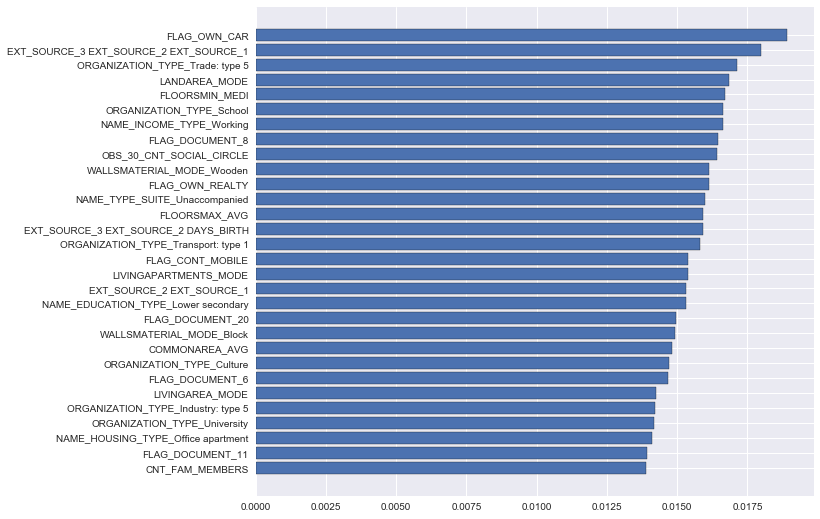

In [86]:
sorted_importance = plot_importance(feature_importance_df)

# What are the top 20 features?

In [87]:
sorted_importance.head(20)

,Feature,Importance
0,FLAG_OWN_CAR,0.018911
1,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1,0.017993
2,ORGANIZATION_TYPE_Trade: type 5,0.017134
3,LANDAREA_MODE,0.016850
4,FLOORSMIN_MEDI,0.016714
5,ORGANIZATION_TYPE_School,0.016634
6,NAME_INCOME_TYPE_Working,0.016617
7,FLAG_DOCUMENT_8,0.016445
8,OBS_30_CNT_SOCIAL_CIRCLE,0.016435
9,WALLSMATERIAL_MODE_Wooden,0.016150


# What happened to the domain engineered features?

In [88]:
sorted_importance[(sorted_importance.Feature=='DIR')|
                  (sorted_importance.Feature=='AIR')|
                  (sorted_importance.Feature=='ACR')|
                  (sorted_importance.Feature=='DAR')]

,Feature,Importance
30,DIR,0.013875
47,AIR,0.006594
116,DAR,0.001777
256,ACR,0.000027


Unfortunately, they didn't end up on the top 10!

### 3. Extra Gradient Boost Model

In [89]:
from xgboost import XGBClassifier

C:\Users\Rakshith\Miniconda3\envs\machinelearning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [141]:
xgb_classifier = XGBClassifier(n_estimators=250,max_depth=5)

In [142]:
xgb_classifier.fit(X_training_set,y_training_set)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=250, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [143]:
xgb_pred = xgb_classifier.predict(X_validation_set)

In [144]:
accuracy_score(y_validation_set,xgb_pred)

0.92056484592871435

In [145]:
xgb_pred_test = xgb_classifier.predict_proba(test_transformed)

In [146]:
submission_xgb = test[['SK_ID_CURR']]
submission_xgb['TARGET'] = xgb_pred_test[:,1]

In [147]:
submission_xgb.to_csv("xgb.csv",index=False)

Scored  0.736 in AUROC - Eval by Kaggle.

## XGBoost Feature Importance

In [138]:
xgb_feature_importance_df = pd.DataFrame({'Feature':features,'Importance':xgb_classifier.feature_importances_})

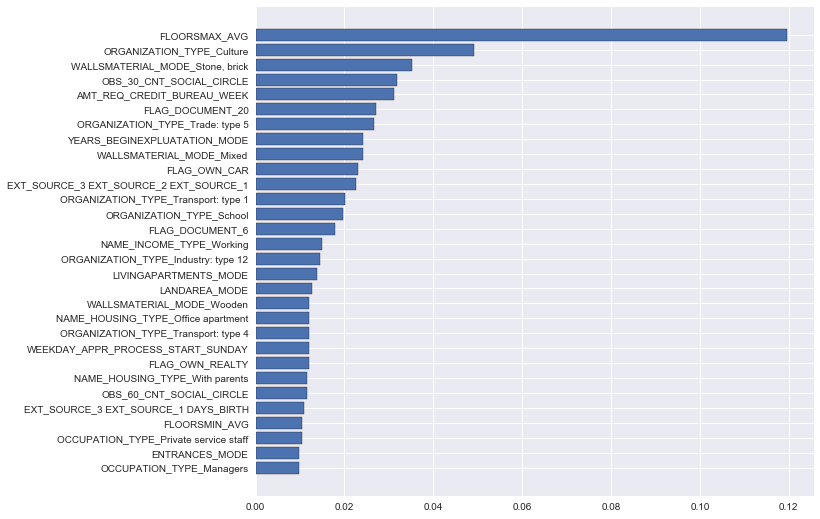

In [139]:
sorted_importance = plot_importance(xgb_feature_importance_df)

In [140]:
sorted_importance[(sorted_importance.Feature=='DIR')|
                  (sorted_importance.Feature=='AIR')|
                  (sorted_importance.Feature=='ACR')|
                  (sorted_importance.Feature=='DAR')]

,Feature,Importance
47,DIR,0.005199
70,AIR,0.002889
83,DAR,0.002311
234,ACR,0.000000
